In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import classification_report, f1_score, roc_auc_score

In [67]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [66]:
log = LogisticRegression()
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

In [52]:
df = pd.read_csv('./data/적자기업모델데이터/시티랩스_모델데이터_scaler.csv',index_col=0)
df.head()

,Date,Close,Volume,Change,MACD,MACD_Signal,MACD_Oscilator,%K,%D,upper_b,...,bar_length,High-Close,High-Open,High-Low,Close-Open,Close-Low,Open-Low,KQ_Change,ND_Change,SP_Change
0,2014-01-29,2090,114002,0.017032,0.293096,0.353843,0.288118,0.156033,0.053030,0.256457,...,0.003193,0.028290,0.028024,0.031501,0.381057,0.013004,0.014803,0.615495,0.515921,0.589419
1,2014-02-03,2080,141833,-0.004785,0.289862,0.352221,0.283582,0.158240,0.106794,0.257742,...,0.000177,0.040590,0.035119,0.034853,0.246696,0.006335,0.009699,0.545194,0.515921,0.589419
2,2014-02-04,2115,541546,0.016827,0.288092,0.350579,0.282578,1.000000,0.440127,0.258248,...,0.038666,0.056991,0.088329,0.108579,0.403084,0.066355,0.045431,0.503587,0.448085,0.530431
3,2014-02-05,2090,174541,-0.011820,0.285940,0.348877,0.280780,0.581818,0.581541,0.258806,...,0.031571,0.044690,0.006740,0.034853,0.359031,0.003001,0.050536,0.541846,0.608214,0.454120
4,2014-02-06,2065,139022,-0.011962,0.283467,0.347086,0.278391,0.001818,0.527778,0.259419,...,0.017382,0.032390,0.010287,0.021448,0.367841,0.000167,0.025013,0.600191,0.545455,0.596442


# 함수화 : add_target(df,target_size,rapid_rate)

In [56]:
def add_target(df,target_size, rapid_rate):  # df index_col=0 해줘야함

    Y = []

    for i in range(len(df)-target_size):

        # Change
        Y.append([df.iloc[i+j,3] for j in range(target_size)])

    
    Y1 = []
    # rapid_rate% 이상 상승일시
    for y in Y:
        toggle = 0

        for i in y:
            if i >= rapid_rate:
                Y1.append(1)
                toggle = 1
                break


        if toggle!=1:
            Y1.append(0)

    df1 = df.iloc[:-target_size,:]
    df1['target'] = Y1
    
    return df1

# 시티랩스 

In [59]:
df = pd.read_csv('./data/적자기업모델데이터/시티랩스_모델데이터_scaler.csv',index_col=0)
df.head()

,Date,Close,Volume,Change,MACD,MACD_Signal,MACD_Oscilator,%K,%D,upper_b,...,bar_length,High-Close,High-Open,High-Low,Close-Open,Close-Low,Open-Low,KQ_Change,ND_Change,SP_Change
0,2014-01-29,2090,114002,0.017032,0.293096,0.353843,0.288118,0.156033,0.053030,0.256457,...,0.003193,0.028290,0.028024,0.031501,0.381057,0.013004,0.014803,0.615495,0.515921,0.589419
1,2014-02-03,2080,141833,-0.004785,0.289862,0.352221,0.283582,0.158240,0.106794,0.257742,...,0.000177,0.040590,0.035119,0.034853,0.246696,0.006335,0.009699,0.545194,0.515921,0.589419
2,2014-02-04,2115,541546,0.016827,0.288092,0.350579,0.282578,1.000000,0.440127,0.258248,...,0.038666,0.056991,0.088329,0.108579,0.403084,0.066355,0.045431,0.503587,0.448085,0.530431
3,2014-02-05,2090,174541,-0.011820,0.285940,0.348877,0.280780,0.581818,0.581541,0.258806,...,0.031571,0.044690,0.006740,0.034853,0.359031,0.003001,0.050536,0.541846,0.608214,0.454120
4,2014-02-06,2065,139022,-0.011962,0.283467,0.347086,0.278391,0.001818,0.527778,0.259419,...,0.017382,0.032390,0.010287,0.021448,0.367841,0.000167,0.025013,0.600191,0.545455,0.596442


## 날짜로부터 30일 안에 급등(10%) 있을시 1 

In [60]:
df1 = add_target(df,target_size=30, rapid_rate=0.1)
df1.head()

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_7944/2812861201.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['target'] = Y1


,Date,Close,Volume,Change,MACD,MACD_Signal,MACD_Oscilator,%K,%D,upper_b,...,High-Close,High-Open,High-Low,Close-Open,Close-Low,Open-Low,KQ_Change,ND_Change,SP_Change,target
0,2014-01-29,2090,114002,0.017032,0.293096,0.353843,0.288118,0.156033,0.053030,0.256457,...,0.028290,0.028024,0.031501,0.381057,0.013004,0.014803,0.615495,0.515921,0.589419,0
1,2014-02-03,2080,141833,-0.004785,0.289862,0.352221,0.283582,0.158240,0.106794,0.257742,...,0.040590,0.035119,0.034853,0.246696,0.006335,0.009699,0.545194,0.515921,0.589419,0
2,2014-02-04,2115,541546,0.016827,0.288092,0.350579,0.282578,1.000000,0.440127,0.258248,...,0.056991,0.088329,0.108579,0.403084,0.066355,0.045431,0.503587,0.448085,0.530431,0
3,2014-02-05,2090,174541,-0.011820,0.285940,0.348877,0.280780,0.581818,0.581541,0.258806,...,0.044690,0.006740,0.034853,0.359031,0.003001,0.050536,0.541846,0.608214,0.454120,0
4,2014-02-06,2065,139022,-0.011962,0.283467,0.347086,0.278391,0.001818,0.527778,0.259419,...,0.032390,0.010287,0.021448,0.367841,0.000167,0.025013,0.600191,0.545455,0.596442,0


In [62]:
x = df1.iloc[:,4:-1]
y = df1['target']

In [64]:
x.shape

(1913, 23)

In [73]:
from collections import Counter
Counter(y)

Counter({0: 1187, 1: 726})

In [79]:
train_test_split = 1500

x_train = x.iloc[:1500,4:]
y_train = y.iloc[:1500]

x_test = x.iloc[1500:,4:]
y_test = y.iloc[1500:]

In [80]:
y_train

0       0
1       0
2       0
3       0
4       0
       ..
1495    1
1496    1
1497    1
1498    1
1499    1
Name: target, Length: 1500, dtype: int64

In [84]:
models = [log,knn,rfc,xgb,lgbm]

for m in models:
    m.fit(x_train,y_train)
    
    preds = m.predict(x_test)
    
    train_score = m.score(x_train,y_train)
    test_score = m.score(x_test,y_test)
    print('train_score :',train_score) 
    print('test_score :',test_score)
    
    
    proba = m.predict_proba(x_test)[:,1]
    
    print(m.__class__.__name__)
    print(classification_report(y_test,preds))
    print('roc_auc_score :', roc_auc_score(y_test, proba))
    print('-'*50)
    

train_score : 0.6806666666666666
test_score : 0.4721549636803874
LogisticRegression
              precision    recall  f1-score   support

           0       0.58      0.16      0.25       228
           1       0.45      0.86      0.59       185

    accuracy                           0.47       413
   macro avg       0.52      0.51      0.42       413
weighted avg       0.52      0.47      0.40       413

roc_auc_score : 0.5686107159791371
--------------------------------------------------
train_score : 0.8033333333333333
test_score : 0.46973365617433416
KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.91      0.04      0.08       228
           1       0.46      0.99      0.63       185

    accuracy                           0.47       413
   macro avg       0.68      0.52      0.36       413
weighted avg       0.71      0.47      0.33       413

roc_auc_score : 0.4862612612612612
--------------------------------------------------
tra

C:\Users\bitcamp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` p

C:\Users\bitcamp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:04:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


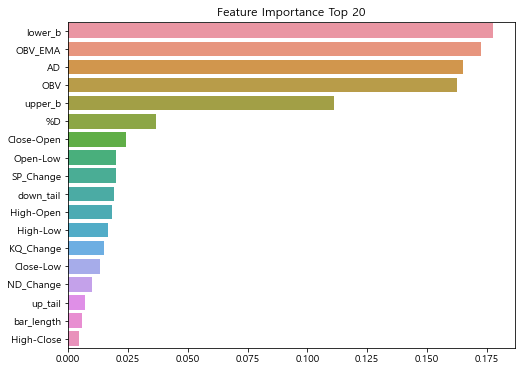

In [85]:
# xgb feature importance 상위 20개
from xgboost import plot_importance

xgb.fit(x_train, y_train)

# 배열형태로 반환
ft_importance_values = xgb.feature_importances_

# 정렬과 시각화를 쉽게 하기 위해 series 전환
ft_series = pd.Series(ft_importance_values, index = x_train.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]

# 시각화
plt.figure(figsize=(8,6))
plt.title('Feature Importance Top 20')
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()

## 20일

In [86]:
df1 = add_target(df,target_size=20, rapid_rate=0.1)
df1.head()

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_7944/2812861201.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['target'] = Y1


,Date,Close,Volume,Change,MACD,MACD_Signal,MACD_Oscilator,%K,%D,upper_b,...,High-Close,High-Open,High-Low,Close-Open,Close-Low,Open-Low,KQ_Change,ND_Change,SP_Change,target
0,2014-01-29,2090,114002,0.017032,0.293096,0.353843,0.288118,0.156033,0.053030,0.256457,...,0.028290,0.028024,0.031501,0.381057,0.013004,0.014803,0.615495,0.515921,0.589419,0
1,2014-02-03,2080,141833,-0.004785,0.289862,0.352221,0.283582,0.158240,0.106794,0.257742,...,0.040590,0.035119,0.034853,0.246696,0.006335,0.009699,0.545194,0.515921,0.589419,0
2,2014-02-04,2115,541546,0.016827,0.288092,0.350579,0.282578,1.000000,0.440127,0.258248,...,0.056991,0.088329,0.108579,0.403084,0.066355,0.045431,0.503587,0.448085,0.530431,0
3,2014-02-05,2090,174541,-0.011820,0.285940,0.348877,0.280780,0.581818,0.581541,0.258806,...,0.044690,0.006740,0.034853,0.359031,0.003001,0.050536,0.541846,0.608214,0.454120,0
4,2014-02-06,2065,139022,-0.011962,0.283467,0.347086,0.278391,0.001818,0.527778,0.259419,...,0.032390,0.010287,0.021448,0.367841,0.000167,0.025013,0.600191,0.545455,0.596442,0


In [88]:
x = df1.iloc[:,4:-1]
y = df1['target']

train_test_split = 1500

x_train = x.iloc[:1500,4:]
y_train = y.iloc[:1500]

x_test = x.iloc[1500:,4:]
y_test = y.iloc[1500:]

In [89]:
models = [log,knn,rfc,xgb,lgbm]

for m in models:
    m.fit(x_train,y_train)
    
    preds = m.predict(x_test)
    
    train_score = m.score(x_train,y_train)
    test_score = m.score(x_test,y_test)
    print('train_score :',train_score) 
    print('test_score :',test_score)
    
    
    proba = m.predict_proba(x_test)[:,1]
    
    print(m.__class__.__name__)
    print(classification_report(y_test,preds))
    print('roc_auc_score :', roc_auc_score(y_test, proba))
    print('-'*50)
    

train_score : 0.7633333333333333
test_score : 0.6737588652482269
LogisticRegression
              precision    recall  f1-score   support

           0       0.67      0.99      0.80       278
           1       0.82      0.06      0.12       145

    accuracy                           0.67       423
   macro avg       0.74      0.53      0.46       423
weighted avg       0.72      0.67      0.57       423

roc_auc_score : 0.6188786901513272
--------------------------------------------------
train_score : 0.8353333333333334
test_score : 0.43498817966903075
KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.59      0.47      0.52       278
           1       0.27      0.37      0.31       145

    accuracy                           0.43       423
   macro avg       0.43      0.42      0.42       423
weighted avg       0.48      0.43      0.45       423

roc_auc_score : 0.4249565864549739
--------------------------------------------------
tra

C:\Users\bitcamp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


C:\Users\bitcamp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:17:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


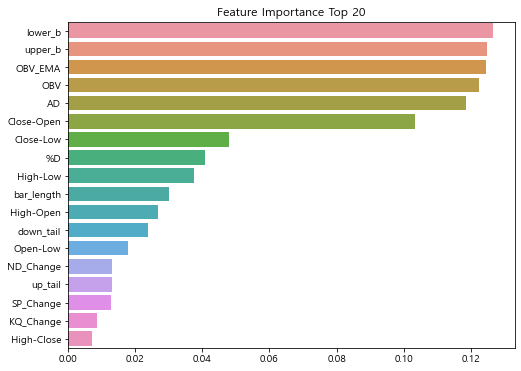

In [94]:
# xgb feature importance 상위 20개
from xgboost import plot_importance

xgb.fit(x_train, y_train)

# 배열형태로 반환
ft_importance_values = xgb.feature_importances_

# 정렬과 시각화를 쉽게 하기 위해 series 전환
ft_series = pd.Series(ft_importance_values, index = x_train.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]

# 시각화
plt.figure(figsize=(8,6))
plt.title('Feature Importance Top 20')
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()

In [92]:
xgb.feature_importances_

array([0.04081232, 0.12482509, 0.12676443, 0.12249476, 0.12449162,
       0.11861022, 0.01296185, 0.02369663, 0.0300265 , 0.00697911,
       0.02682755, 0.03762015, 0.10332044, 0.04792736, 0.01793052,
       0.00870799, 0.01317749, 0.01282599], dtype=float32)

## 10일

In [95]:
df1 = add_target(df,target_size=10, rapid_rate=0.1)
df1.head()

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_7944/2812861201.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['target'] = Y1


,Date,Close,Volume,Change,MACD,MACD_Signal,MACD_Oscilator,%K,%D,upper_b,...,High-Close,High-Open,High-Low,Close-Open,Close-Low,Open-Low,KQ_Change,ND_Change,SP_Change,target
0,2014-01-29,2090,114002,0.017032,0.293096,0.353843,0.288118,0.156033,0.053030,0.256457,...,0.028290,0.028024,0.031501,0.381057,0.013004,0.014803,0.615495,0.515921,0.589419,0
1,2014-02-03,2080,141833,-0.004785,0.289862,0.352221,0.283582,0.158240,0.106794,0.257742,...,0.040590,0.035119,0.034853,0.246696,0.006335,0.009699,0.545194,0.515921,0.589419,0
2,2014-02-04,2115,541546,0.016827,0.288092,0.350579,0.282578,1.000000,0.440127,0.258248,...,0.056991,0.088329,0.108579,0.403084,0.066355,0.045431,0.503587,0.448085,0.530431,0
3,2014-02-05,2090,174541,-0.011820,0.285940,0.348877,0.280780,0.581818,0.581541,0.258806,...,0.044690,0.006740,0.034853,0.359031,0.003001,0.050536,0.541846,0.608214,0.454120,0
4,2014-02-06,2065,139022,-0.011962,0.283467,0.347086,0.278391,0.001818,0.527778,0.259419,...,0.032390,0.010287,0.021448,0.367841,0.000167,0.025013,0.600191,0.545455,0.596442,0


In [96]:
x = df1.iloc[:,4:-1]
y = df1['target']

train_test_split = 1500

x_train = x.iloc[:1500,4:]
y_train = y.iloc[:1500]

x_test = x.iloc[1500:,4:]
y_test = y.iloc[1500:]

In [97]:
models = [log,knn,rfc,xgb,lgbm]

for m in models:
    m.fit(x_train,y_train)
    
    preds = m.predict(x_test)
    
    train_score = m.score(x_train,y_train)
    test_score = m.score(x_test,y_test)
    print('train_score :',train_score) 
    print('test_score :',test_score)
    
    
    proba = m.predict_proba(x_test)[:,1]
    
    print(m.__class__.__name__)
    print(classification_report(y_test,preds))
    print('roc_auc_score :', roc_auc_score(y_test, proba))
    print('-'*50)
    

train_score : 0.864
test_score : 0.7875288683602771
LogisticRegression
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       338
           1       1.00      0.03      0.06        95

    accuracy                           0.79       433
   macro avg       0.89      0.52      0.47       433
weighted avg       0.83      0.79      0.70       433

roc_auc_score : 0.6217377763936468
--------------------------------------------------
train_score : 0.8873333333333333
test_score : 0.6558891454965358
KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.76      0.81      0.79       338
           1       0.12      0.09      0.11        95

    accuracy                           0.66       433
   macro avg       0.44      0.45      0.45       433
weighted avg       0.62      0.66      0.64       433

roc_auc_score : 0.4774213640610401
--------------------------------------------------
train_score : 1.0

C:\Users\bitcamp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


## 10일 15%

In [111]:
df11 = add_target(df,target_size=10, rapid_rate=0.15)

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_7944/2812861201.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['target'] = Y1


In [112]:
x = df11.iloc[:,4:-1]
y = df11['target']

train_test_split = 1500

x_train = x.iloc[:1500,4:]
y_train = y.iloc[:1500]

x_test = x.iloc[1500:,4:]
y_test = y.iloc[1500:]

In [113]:
models = [log,knn,rfc,xgb,lgbm]

for m in models:
    m.fit(x_train,y_train)
    
    preds = m.predict(x_test)
    
    train_score = m.score(x_train,y_train)
    test_score = m.score(x_test,y_test)
    print('train_score :',train_score) 
    print('test_score :',test_score)
    
    
    proba = m.predict_proba(x_test)[:,1]
    
    print(m.__class__.__name__)
    print(classification_report(y_test,preds))
    print('roc_auc_score :', roc_auc_score(y_test, proba))
    print('-'*50)

train_score : 0.9286666666666666
test_score : 0.8960739030023095
LogisticRegression
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       387
           1       1.00      0.02      0.04        46

    accuracy                           0.90       433
   macro avg       0.95      0.51      0.49       433
weighted avg       0.91      0.90      0.85       433

roc_auc_score : 0.5417368834962364
--------------------------------------------------
train_score : 0.94
test_score : 0.8937644341801386
KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       387
           1       0.00      0.00      0.00        46

    accuracy                           0.89       433
   macro avg       0.45      0.50      0.47       433
weighted avg       0.80      0.89      0.84       433

roc_auc_score : 0.5082855858892259
--------------------------------------------------


C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


train_score : 1.0
test_score : 0.8406466512702079
RandomForestClassifier
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       387
           1       0.30      0.37      0.33        46

    accuracy                           0.84       433
   macro avg       0.61      0.63      0.62       433
weighted avg       0.86      0.84      0.85       433

roc_auc_score : 0.797157622739018
--------------------------------------------------
[20:44:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train_score : 1.0
test_score : 0.8221709006928406
XGBClassifier
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       387
           1       0.21      0.2

C:\Users\bitcamp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


# 중앙디앤엠

In [98]:
df2 = pd.read_csv('./data/적자기업모델데이터/중앙디앤엠_모델데이터_scaler.csv',index_col=0)
df2.head()

,Date,Close,Volume,Change,MACD,MACD_Signal,MACD_Oscilator,%K,%D,upper_b,...,bar_length,High-Close,High-Open,High-Low,Close-Open,Close-Low,Open-Low,KQ_Change,ND_Change,SP_Change
0,2014-01-29,5024,17148,-0.146503,0.139969,0.155127,0.385789,0.496400,0.331797,0.114979,...,0.012498,0.014509,0.021143,0.022798,0.514824,0.027767,0.010900,0.615495,0.515921,0.589419
1,2014-02-03,5009,3689,-0.002986,0.139527,0.154822,0.385317,0.668211,0.554819,0.114979,...,0.016799,0.014279,0.024093,0.015144,0.517011,0.015995,0.000135,0.545194,0.515921,0.589419
2,2014-02-04,5009,3744,-0.146503,0.139157,0.154512,0.385058,0.860753,0.675957,0.115062,...,0.004166,0.000115,0.002655,0.015144,0.510589,0.031862,0.019368,0.503587,0.448085,0.530431
3,2014-02-05,5024,2925,0.002995,0.138940,0.154214,0.385203,1.000000,0.843392,0.114803,...,0.008198,0.010825,0.014849,0.012539,0.512638,0.015739,0.005315,0.541846,0.608214,0.454120
4,2014-02-06,5024,1871,-0.146503,0.138758,0.153929,0.385414,1.000000,0.953704,0.114489,...,0.016530,0.003685,0.014849,0.007491,0.516874,0.015739,0.000135,0.600191,0.545455,0.596442


## 10일 10%

In [99]:
df2 = add_target(df2,target_size=10,rapid_rate=0.1)

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_7944/2812861201.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['target'] = Y1


In [100]:
x = df2.iloc[:,4:-1]
y = df2['target']

train_test_split = 1500

x_train = x.iloc[:1500,4:]
y_train = y.iloc[:1500]

x_test = x.iloc[1500:,4:]
y_test = y.iloc[1500:]

In [103]:
from collections import Counter
Counter(y_test)

Counter({0: 258, 1: 179})

In [101]:
models = [log,knn,rfc,xgb,lgbm]

for m in models:
    m.fit(x_train,y_train)
    
    preds = m.predict(x_test)
    
    train_score = m.score(x_train,y_train)
    test_score = m.score(x_test,y_test)
    print('train_score :',train_score) 
    print('test_score :',test_score)
    
    
    proba = m.predict_proba(x_test)[:,1]
    
    print(m.__class__.__name__)
    print(classification_report(y_test,preds))
    print('roc_auc_score :', roc_auc_score(y_test, proba))
    print('-'*50)
    

train_score : 0.726
test_score : 0.6247139588100686
LogisticRegression
              precision    recall  f1-score   support

           0       0.61      0.98      0.76       258
           1       0.80      0.11      0.20       179

    accuracy                           0.62       437
   macro avg       0.71      0.55      0.48       437
weighted avg       0.69      0.62      0.53       437

roc_auc_score : 0.5622103849984842
--------------------------------------------------
train_score : 0.8
test_score : 0.6109839816933639
KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.61      0.96      0.74       258
           1       0.66      0.11      0.18       179

    accuracy                           0.61       437
   macro avg       0.63      0.53      0.46       437
weighted avg       0.63      0.61      0.51       437

roc_auc_score : 0.5630981767788317
--------------------------------------------------
train_score : 1.0
test_score : 0

C:\Users\bitcamp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


## 10일 15%

In [107]:
df22 = add_target(df2,target_size=10,rapid_rate=0.15)

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_7944/2812861201.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['target'] = Y1


In [108]:
x = df22.iloc[:,4:-1]
y = df22['target']

train_test_split = 1500

x_train = x.iloc[:1500,4:]
y_train = y.iloc[:1500]

x_test = x.iloc[1500:,4:]
y_test = y.iloc[1500:]

In [109]:
from collections import Counter
Counter(y_test)

Counter({0: 336, 1: 91})

In [110]:
models = [log,knn,rfc,xgb,lgbm]

for m in models:
    m.fit(x_train,y_train)
    
    preds = m.predict(x_test)
    
    train_score = m.score(x_train,y_train)
    test_score = m.score(x_test,y_test)
    print('train_score :',train_score) 
    print('test_score :',test_score)
    
    
    proba = m.predict_proba(x_test)[:,1]
    
    print(m.__class__.__name__)
    print(classification_report(y_test,preds))
    print('roc_auc_score :', roc_auc_score(y_test, proba))
    print('-'*50)
    

train_score : 0.866
test_score : 0.7915690866510539
LogisticRegression
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       336
           1       0.67      0.04      0.08        91

    accuracy                           0.79       427
   macro avg       0.73      0.52      0.48       427
weighted avg       0.77      0.79      0.71       427

roc_auc_score : 0.5104003139717426
--------------------------------------------------
train_score : 0.896
test_score : 0.7798594847775175
KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       336
           1       0.00      0.00      0.00        91

    accuracy                           0.78       427
   macro avg       0.39      0.50      0.44       427
weighted avg       0.62      0.78      0.69       427

roc_auc_score : 0.5687957875457875
--------------------------------------------------
train_score : 1.0
test_score :

C:\Users\bitcamp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


# 노블엠앤비

In [114]:
df3 = pd.read_csv('./data/적자기업모델데이터/노블엠앤비_모델데이터_scaler.csv',index_col=0)
df3.head()

,Date,Close,Volume,Change,MACD,MACD_Signal,MACD_Oscilator,%K,%D,upper_b,...,bar_length,High-Close,High-Open,High-Low,Close-Open,Close-Low,Open-Low,KQ_Change,ND_Change,SP_Change
0,2014-01-29,115459,91319,0.026841,0.378839,0.397158,0.556185,1.000000,0.486918,0.341007,...,0.020143,0.007919,0.035877,0.037237,0.586128,0.054305,0.019511,0.615495,0.515921,0.589419
1,2014-02-03,115086,53798,-0.003231,0.380362,0.398433,0.557153,0.929143,0.796695,0.342532,...,0.020209,0.003985,0.029878,0.029571,0.586166,0.047556,0.014572,0.545194,0.515921,0.589419
2,2014-02-04,112068,50564,-0.026224,0.379982,0.399531,0.553273,0.355827,0.762284,0.342493,...,0.004766,0.023245,0.029719,0.037065,0.571809,0.027291,0.024308,0.503587,0.448085,0.530431
3,2014-02-05,110554,66695,-0.013510,0.378836,0.400402,0.547843,0.001319,0.428950,0.342471,...,0.034764,0.027230,0.000020,0.044791,0.554574,0.034058,0.058455,0.541846,0.608214,0.454120
4,2014-02-06,110554,61102,-0.149371,0.377874,0.401092,0.543390,0.001319,0.119174,0.342201,...,0.000007,0.023461,0.035782,0.033313,0.574559,0.020256,0.014559,0.600191,0.545455,0.596442


## 10일 10%

In [116]:
df33 = add_target(df3,target_size=10, rapid_rate=0.1)

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_7944/2812861201.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['target'] = Y1


## 10일 15%

# KH전자

## 10일 10%

## 10일 15%